In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [17]:
train=pd.read_csv('/kaggle/input/titanic/train.csv', index_col="PassengerId")
test=pd.read_csv('/kaggle/input/titanic/test.csv', index_col="PassengerId")

In [18]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


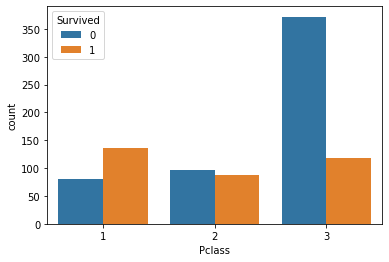

In [20]:
import seaborn as sns
sns.countplot(data=train, x="Pclass",hue="Survived")

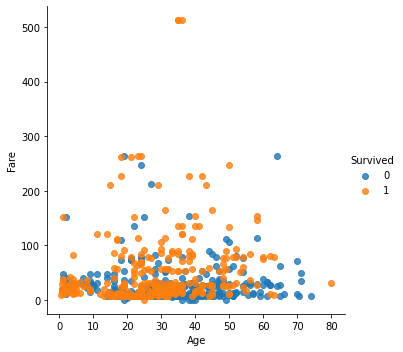

In [21]:
sns.lmplot(data=train, x="Age",y="Fare", hue="Survived", fit_reg=False)

In [22]:
# Drop columns in training and test data
reduced_train = train.dropna(subset=["Age"])
reduced_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
features=["Pclass", "Sex", "SibSp", "Parch","Age"]

Xtrain=pd.get_dummies(reduced_train[features])
ytrain=reduced_train["Survived"]

Xtest=pd.get_dummies(test[features])

Xtest.head()

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male
PassengerId,,,,,,
892,3,0,0,34.5,0,1
893,3,1,0,47.0,1,0
894,2,0,0,62.0,0,1
895,3,0,0,27.0,0,1
896,3,1,1,22.0,1,0


In [34]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)

(714, 6)
(714,)
(418, 6)


In [41]:
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
clf=xgb.XGBClassifier()

grid_clf=GridSearchCV(clf, {'max_depth':[2,4,6],'n_estimators':[50,100,150,200]},verbose=1)
grid_clf.fit(Xtrain,ytrain)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 2, 'n_estimators': 100}
0.8291736432581504


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.5s finished


In [37]:
clf=xgb.XGBClassifier(max_depth=2, n_estimators=100)
clf.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
print(test.index)
predictions = clf.predict(Xtest)

output = pd.DataFrame({"Survived":predictions},index=Xtest.index)

print(output)
output.to_csv('my_submission.csv')
output.head()

print("my submission was successfully saved!")

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)
             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                1
1306                1
1307                0
1308                1
1309                1

[418 rows x 1 columns]
my submission was successfully saved!
